# Business Case 1

## Wonderful Wine of the World

Wonderful Wines of the World (WWW) is a 7-year-old enterprise that seeks out small, unique wineries around the world and brings their wines to its customers. Its mission is to delight its customers with well-made, unique, and interesting wines that would never travel far beyond their points of origin.

For more informations about the business context, the report is available.

The objectives of this analysis are mainly 2 :
- profiling groups of customers
- identifying an appropriate marketing campaign

## 1. Importing the data and the libraries

In [42]:
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import graphviz

#sklearn
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering, KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors

#sompy
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [2]:
# Importing the dataset
df = pd.read_excel(r'C:\Users\lorep\Documents\Github\business-cases\BC1_customer_segmentation\WonderfulWinesoftheWorld.xlsx')

## 2. Data exploration

In [3]:
df.head()

Custid  Dayswus  Age  Edu  Income  Kidhome  Teenhome  Freq  Recency  \
0    5325      653   55   20   78473        0         0    20       18   
1    3956     1041   75   18  105087        0         0    36       33   
2    3681      666   18   12   27984        1         0     4       56   
3    2829     1049   42   16   61748        1         1     2       46   
4    8788      837   47   16   65789        0         1     2        3   

   Monetary  ...  WebVisit  SMRack  LGRack  Humid  Spcork  Bucket  Access  \
0       826  ...         5       0       0      0       0       0       0   
1      1852  ...         4       0       0      0       1       0       0   
2        39  ...         8       0       0      0       0       0       0   
3        37  ...         7       0       0      0       0       0       0   
4        36  ...         6       0       0      0       0       0       0   

   Complain  Mailfriend  Emailfriend  
0         0           0            0  
1         0           0            0  
2         0           0            0  
3         0           1            1  
4         0           0            0  

[5 rows x 29 columns]

In [4]:
df.shape

(10000, 29)

In [5]:
df.describe(include = 'all').transpose()

count        mean           std      min       25%      50%  \
Custid       10000.0   6000.5000   2886.895680   1001.0   3500.75   6000.5   
Dayswus      10000.0    898.1020    202.492789    550.0    723.75    894.0   
Age          10000.0     47.9273     17.302721     18.0     33.00     48.0   
Edu          10000.0     16.7391      1.876375     12.0     15.00     17.0   
Income       10000.0  69904.3580  27612.233311  10000.0  47642.00  70012.0   
Kidhome      10000.0      0.4188      0.493387      0.0      0.00      0.0   
Teenhome     10000.0      0.4698      0.499112      0.0      0.00      0.0   
Freq         10000.0     14.6281     11.969073      1.0      4.00     12.0   
Recency      10000.0     62.4068     69.874255      0.0     26.00     52.0   
Monetary     10000.0    622.5552    647.135323      6.0     63.00    383.0   
LTV          10000.0    209.0712    291.986040   -178.0     -2.00     57.0   
Perdeal      10000.0     32.3972     27.897094      0.0      6.00     25.0   
Dryred       10000.0     50.3827     23.453815      1.0     32.00     51.0   
Sweetred     10000.0      7.0545      7.866544      0.0      2.00      4.0   
Drywh        10000.0     28.5213     12.583957      1.0     19.00     28.0   
Sweetwh      10000.0      7.0698      8.015083      0.0      2.00      4.0   
Dessert      10000.0      6.9474      7.879546      0.0      2.00      4.0   
Exotic       10000.0     16.5466     17.247672      0.0      4.00     10.0   
WebPurchase  10000.0     42.3762     18.522062      4.0     28.00     45.0   
WebVisit     10000.0      5.2166      2.330457      0.0      3.00      6.0   
SMRack       10000.0      0.0817      0.273921      0.0      0.00      0.0   
LGRack       10000.0      0.0696      0.254484      0.0      0.00      0.0   
Humid        10000.0      0.0817      0.273921      0.0      0.00      0.0   
Spcork       10000.0      0.0682      0.252101      0.0      0.00      0.0   
Bucket       10000.0      0.0130      0.113280      0.0      0.00      0.0   
Access       10000.0      0.2460      0.539178      0.0      0.00      0.0   
Complain     10000.0      0.0112      0.105241      0.0      0.00      0.0   
Mailfriend   10000.0      0.1019      0.302532      0.0      0.00      0.0   
Emailfriend  10000.0      0.0511      0.220213      0.0      0.00      0.0   

                  75%       max  
Custid        8500.25   11000.0  
Dayswus       1074.00    1250.0  
Age             63.00      78.0  
Edu             18.00      20.0  
Income       92147.00  140628.0  
Kidhome          1.00       1.0  
Teenhome         1.00       1.0  
Freq            24.00      56.0  
Recency         78.25     549.0  
Monetary      1077.00    3052.0  
LTV            364.00    1791.0  
Perdeal         56.00      97.0  
Dryred          69.00      99.0  
Sweetred        10.00      75.0  
Drywh           37.00      74.0  
Sweetwh         10.00      62.0  
Dessert          9.00      77.0  
Exotic          23.00      96.0  
WebPurchase     57.00      88.0  
WebVisit         7.00      10.0  
SMRack           0.00       1.0  
LGRack           0.00       1.0  
Humid            0.00       1.0  
Spcork           0.00       1.0  
Bucket           0.00       1.0  
Access           0.00       3.0  
Complain         0.00       1.0  
Mailfriend       0.00       1.0  
Emailfriend      0.00       1.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Custid       10000 non-null  int64
 1   Dayswus      10000 non-null  int64
 2   Age          10000 non-null  int64
 3   Edu          10000 non-null  int64
 4   Income       10000 non-null  int64
 5   Kidhome      10000 non-null  int64
 6   Teenhome     10000 non-null  int64
 7   Freq         10000 non-null  int64
 8   Recency      10000 non-null  int64
 9   Monetary     10000 non-null  int64
 10  LTV          10000 non-null  int64
 11  Perdeal      10000 non-null  int64
 12  Dryred       10000 non-null  int64
 13  Sweetred     10000 non-null  int64
 14  Drywh        10000 non-null  int64
 15  Sweetwh      10000 non-null  int64
 16  Dessert      10000 non-null  int64
 17  Exotic       10000 non-null  int64
 18  WebPurchase  10000 non-null  int64
 19  WebVisit     10000 non-null  int64
 20  SMRack 

In [7]:
df.isna().sum()

Custid         0
Dayswus        0
Age            0
Edu            0
Income         0
Kidhome        0
Teenhome       0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
SMRack         0
LGRack         0
Humid          0
Spcork         0
Bucket         0
Access         0
Complain       0
Mailfriend     0
Emailfriend    0
dtype: int64

In [8]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

Empty DataFrame
Columns: [Custid, Dayswus, Age, Edu, Income, Kidhome, Teenhome, Freq, Recency, Monetary, LTV, Perdeal, Dryred, Sweetred, Drywh, Sweetwh, Dessert, Exotic, WebPurchase, WebVisit, SMRack, LGRack, Humid, Spcork, Bucket, Access, Complain, Mailfriend, Emailfriend]
Index: []

[0 rows x 29 columns]

In [9]:
#setting the index of the dataset
df = df.set_index('Custid')

### Notations
The dataset contains 10000 customers and 29 variables. The variables contain informations about the donors characteristics, the history of the wine-purchased and the products themselves that interested the customer.
The dataset doesn't contain missing values, and neither duplicated rows.
The 29 varaibles are all numerical, even though some of them are ratios and others are just binary. Other variables are expressed in percentages. A normalization for the different scales of the values of the features is needed.

In [10]:
df.columns

Index(['Dayswus', 'Age', 'Edu', 'Income', 'Kidhome', 'Teenhome', 'Freq',
       'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred', 'Drywh',
       'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit', 'SMRack',
       'LGRack', 'Humid', 'Spcork', 'Bucket', 'Access', 'Complain',
       'Mailfriend', 'Emailfriend'],
      dtype='object')

In [11]:
# defining metric and non-metric features
metric_features = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary', 'LTV', 'Perdeal', 'Dryred', 'Sweetred', 'Drywh', 'Sweetwh', 'Dessert', 'Exotic', 'WebPurchase', 'WebVisit', 'Access']

non_metric_features =  df.columns.drop(metric_features).to_list()

In [12]:
df[metric_features]

Dayswus  Age  Edu  Income  Freq  Recency  Monetary  LTV  Perdeal  \
Custid                                                                     
5325        653   55   20   78473    20       18       826  445        7   
3956       1041   75   18  105087    36       33      1852  539        2   
3681        666   18   12   27984     4       56        39   -7       88   
2829       1049   42   16   61748     2       46        37   -6       70   
8788        837   47   16   65789     2        3        36    4       35   
...         ...  ...  ...     ...   ...      ...       ...  ...      ...   
1383       1132   57   20   81033    19       59       776  187       22   
4070        596   66   15   84714    18       45       720  391        5   
7909        619   18   12   40466     3       65        47    5       23   
4158       1107   33   16   53661     1      368        15    2       35   
4914        979   55   16   94926    25       28      1148  293        7   

        Dryred  Sweetred  Drywh  Sweetwh  Dessert  Exotic  WebPurchase  \
Custid                                                                   
5325        67         4     26        2        1       1           36   
3956        49         0     46        1        3       0           20   
3681         4        29     14       32       21      48           60   
2829        86         1     11        1        1      55           59   
8788        85         0     12        2        1      28           63   
...        ...       ...    ...      ...      ...     ...          ...   
1383        78         0     20        1        1      11           27   
4070        30        12     36       10       12      13           18   
7909         6        24     10       38       22      41           58   
4158        18        13     45       11       13      13           60   
4914        63        10     13       11        3       4           34   

        WebVisit  Access  
Custid                    
5325           5       0  
3956           4       0  
3681           8       0  
2829           7       0  
8788           6       0  
...          ...     ...  
1383           4       1  
4070           2       0  
7909           5       0  
4158           6       0  
4914           5       0  

[10000 rows x 18 columns]

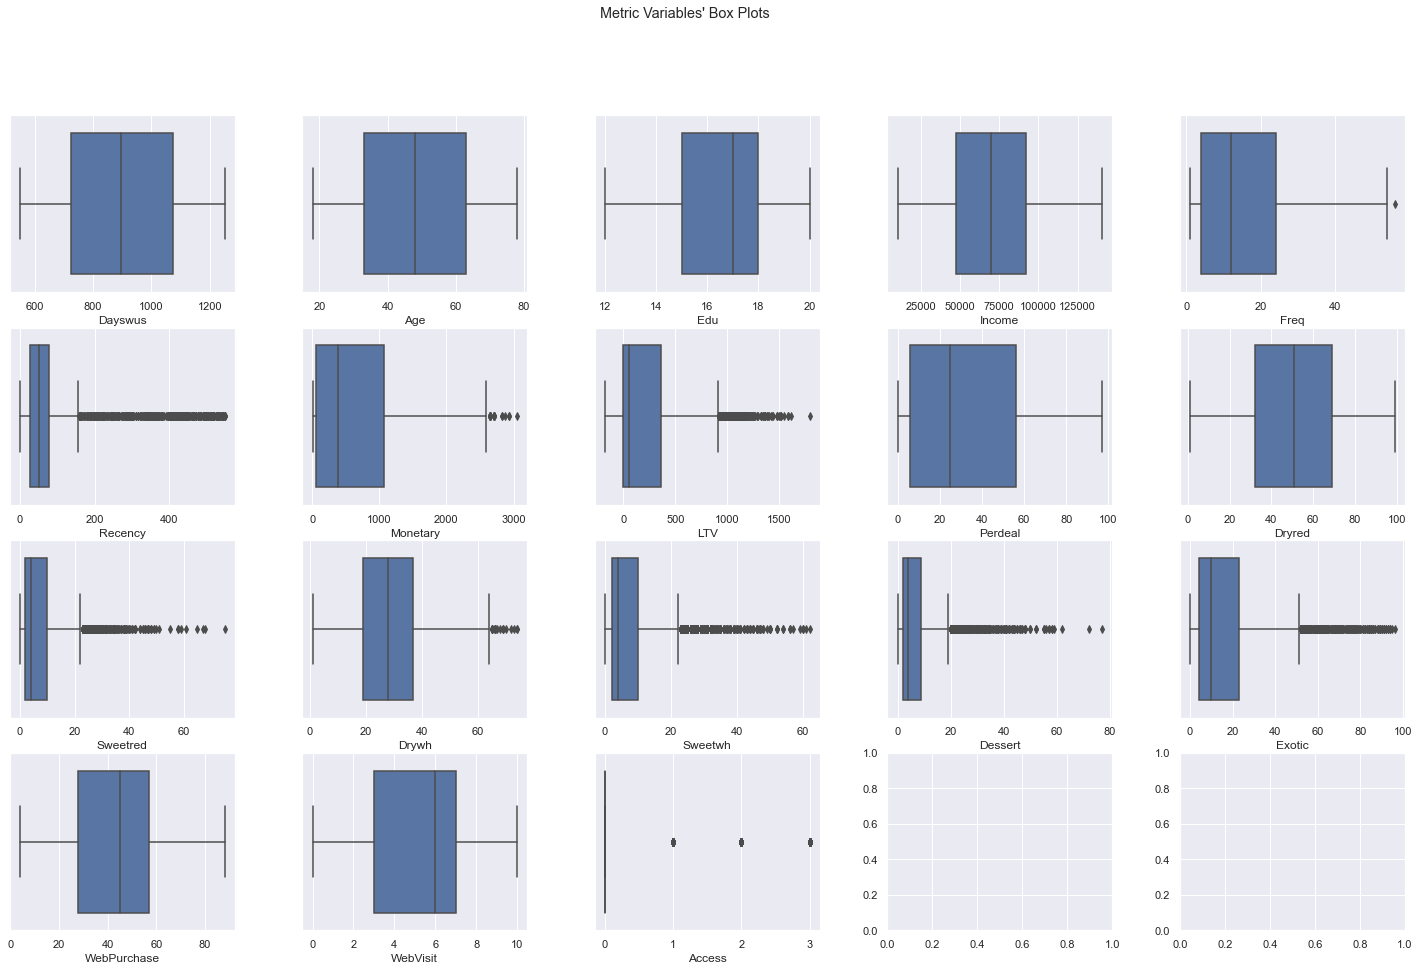

In [13]:
# getting an idea of the distributions of the variables

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(25, 15))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

plt.show()

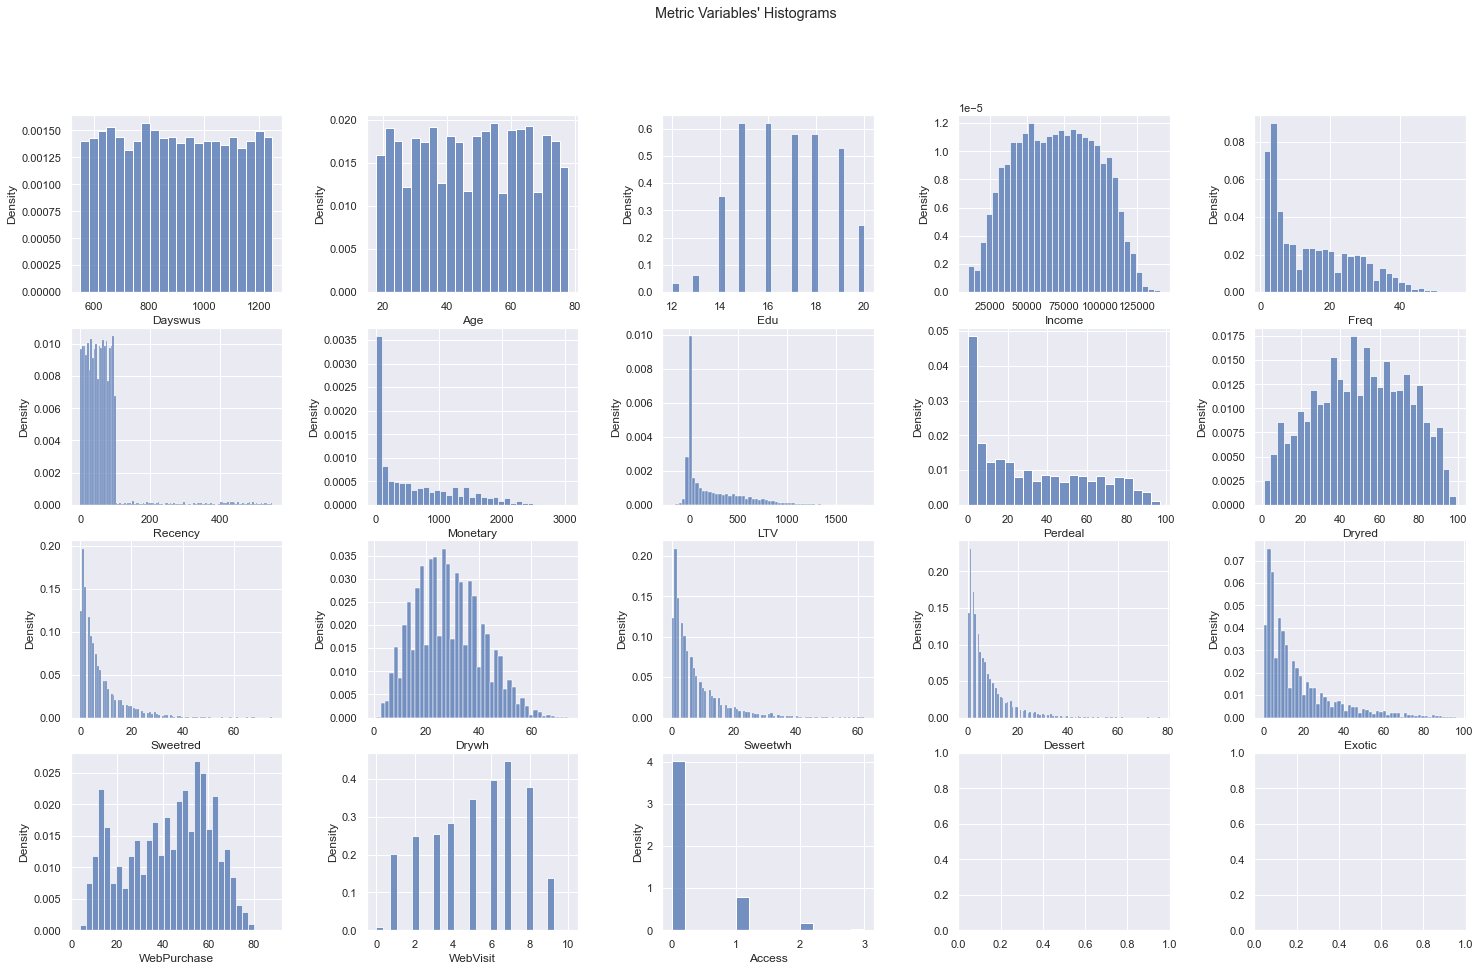

In [15]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(25, 15))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

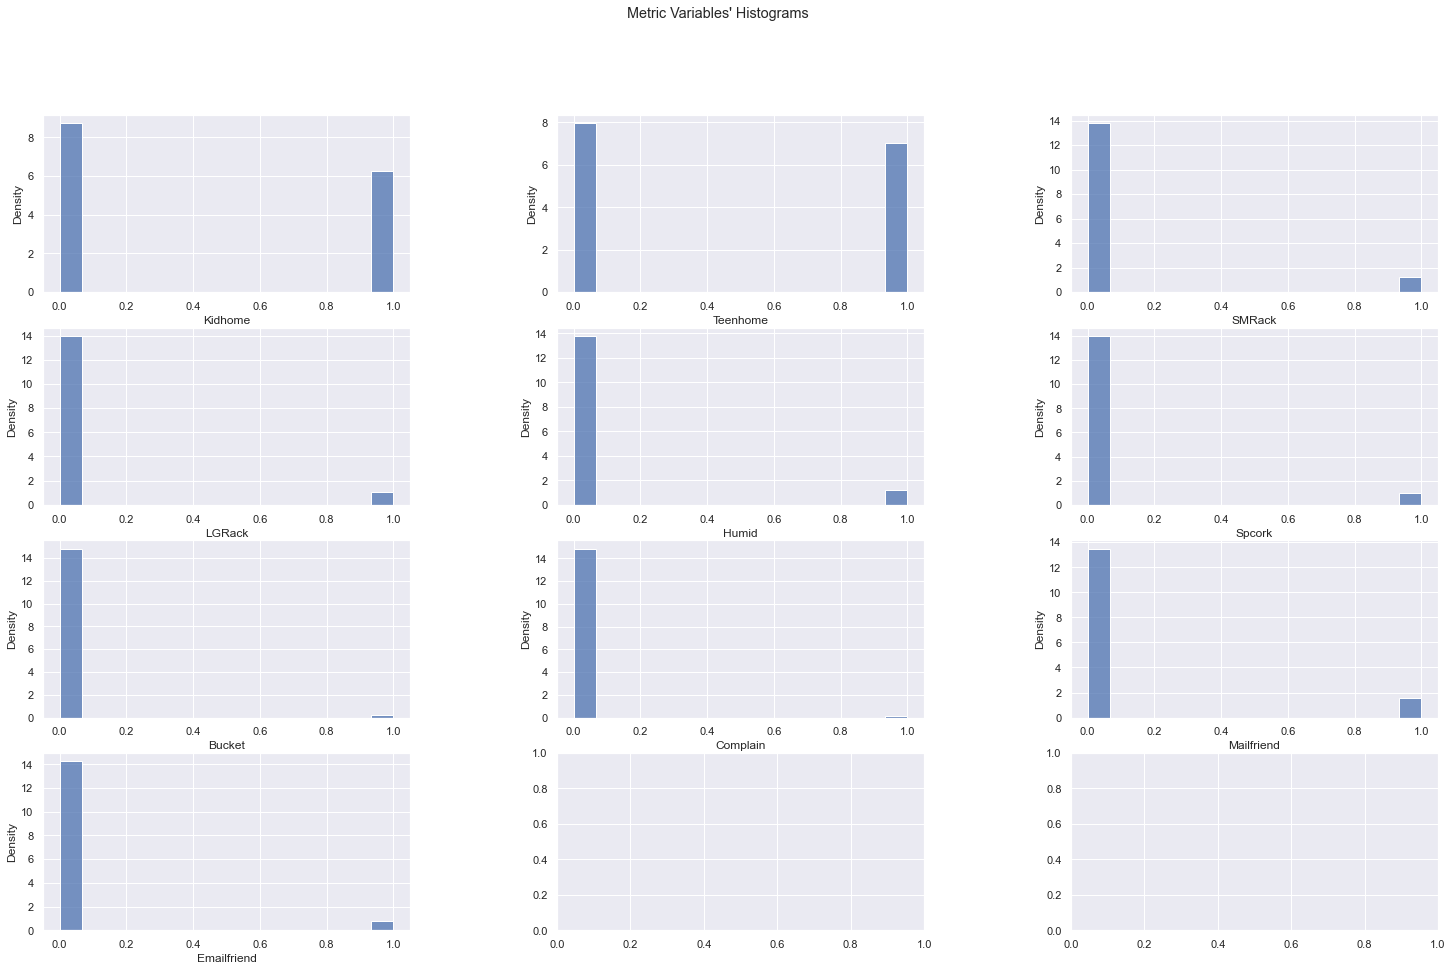

In [16]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(non_metric_features) / 4), figsize=(25, 15))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.histplot(x=df[feat], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

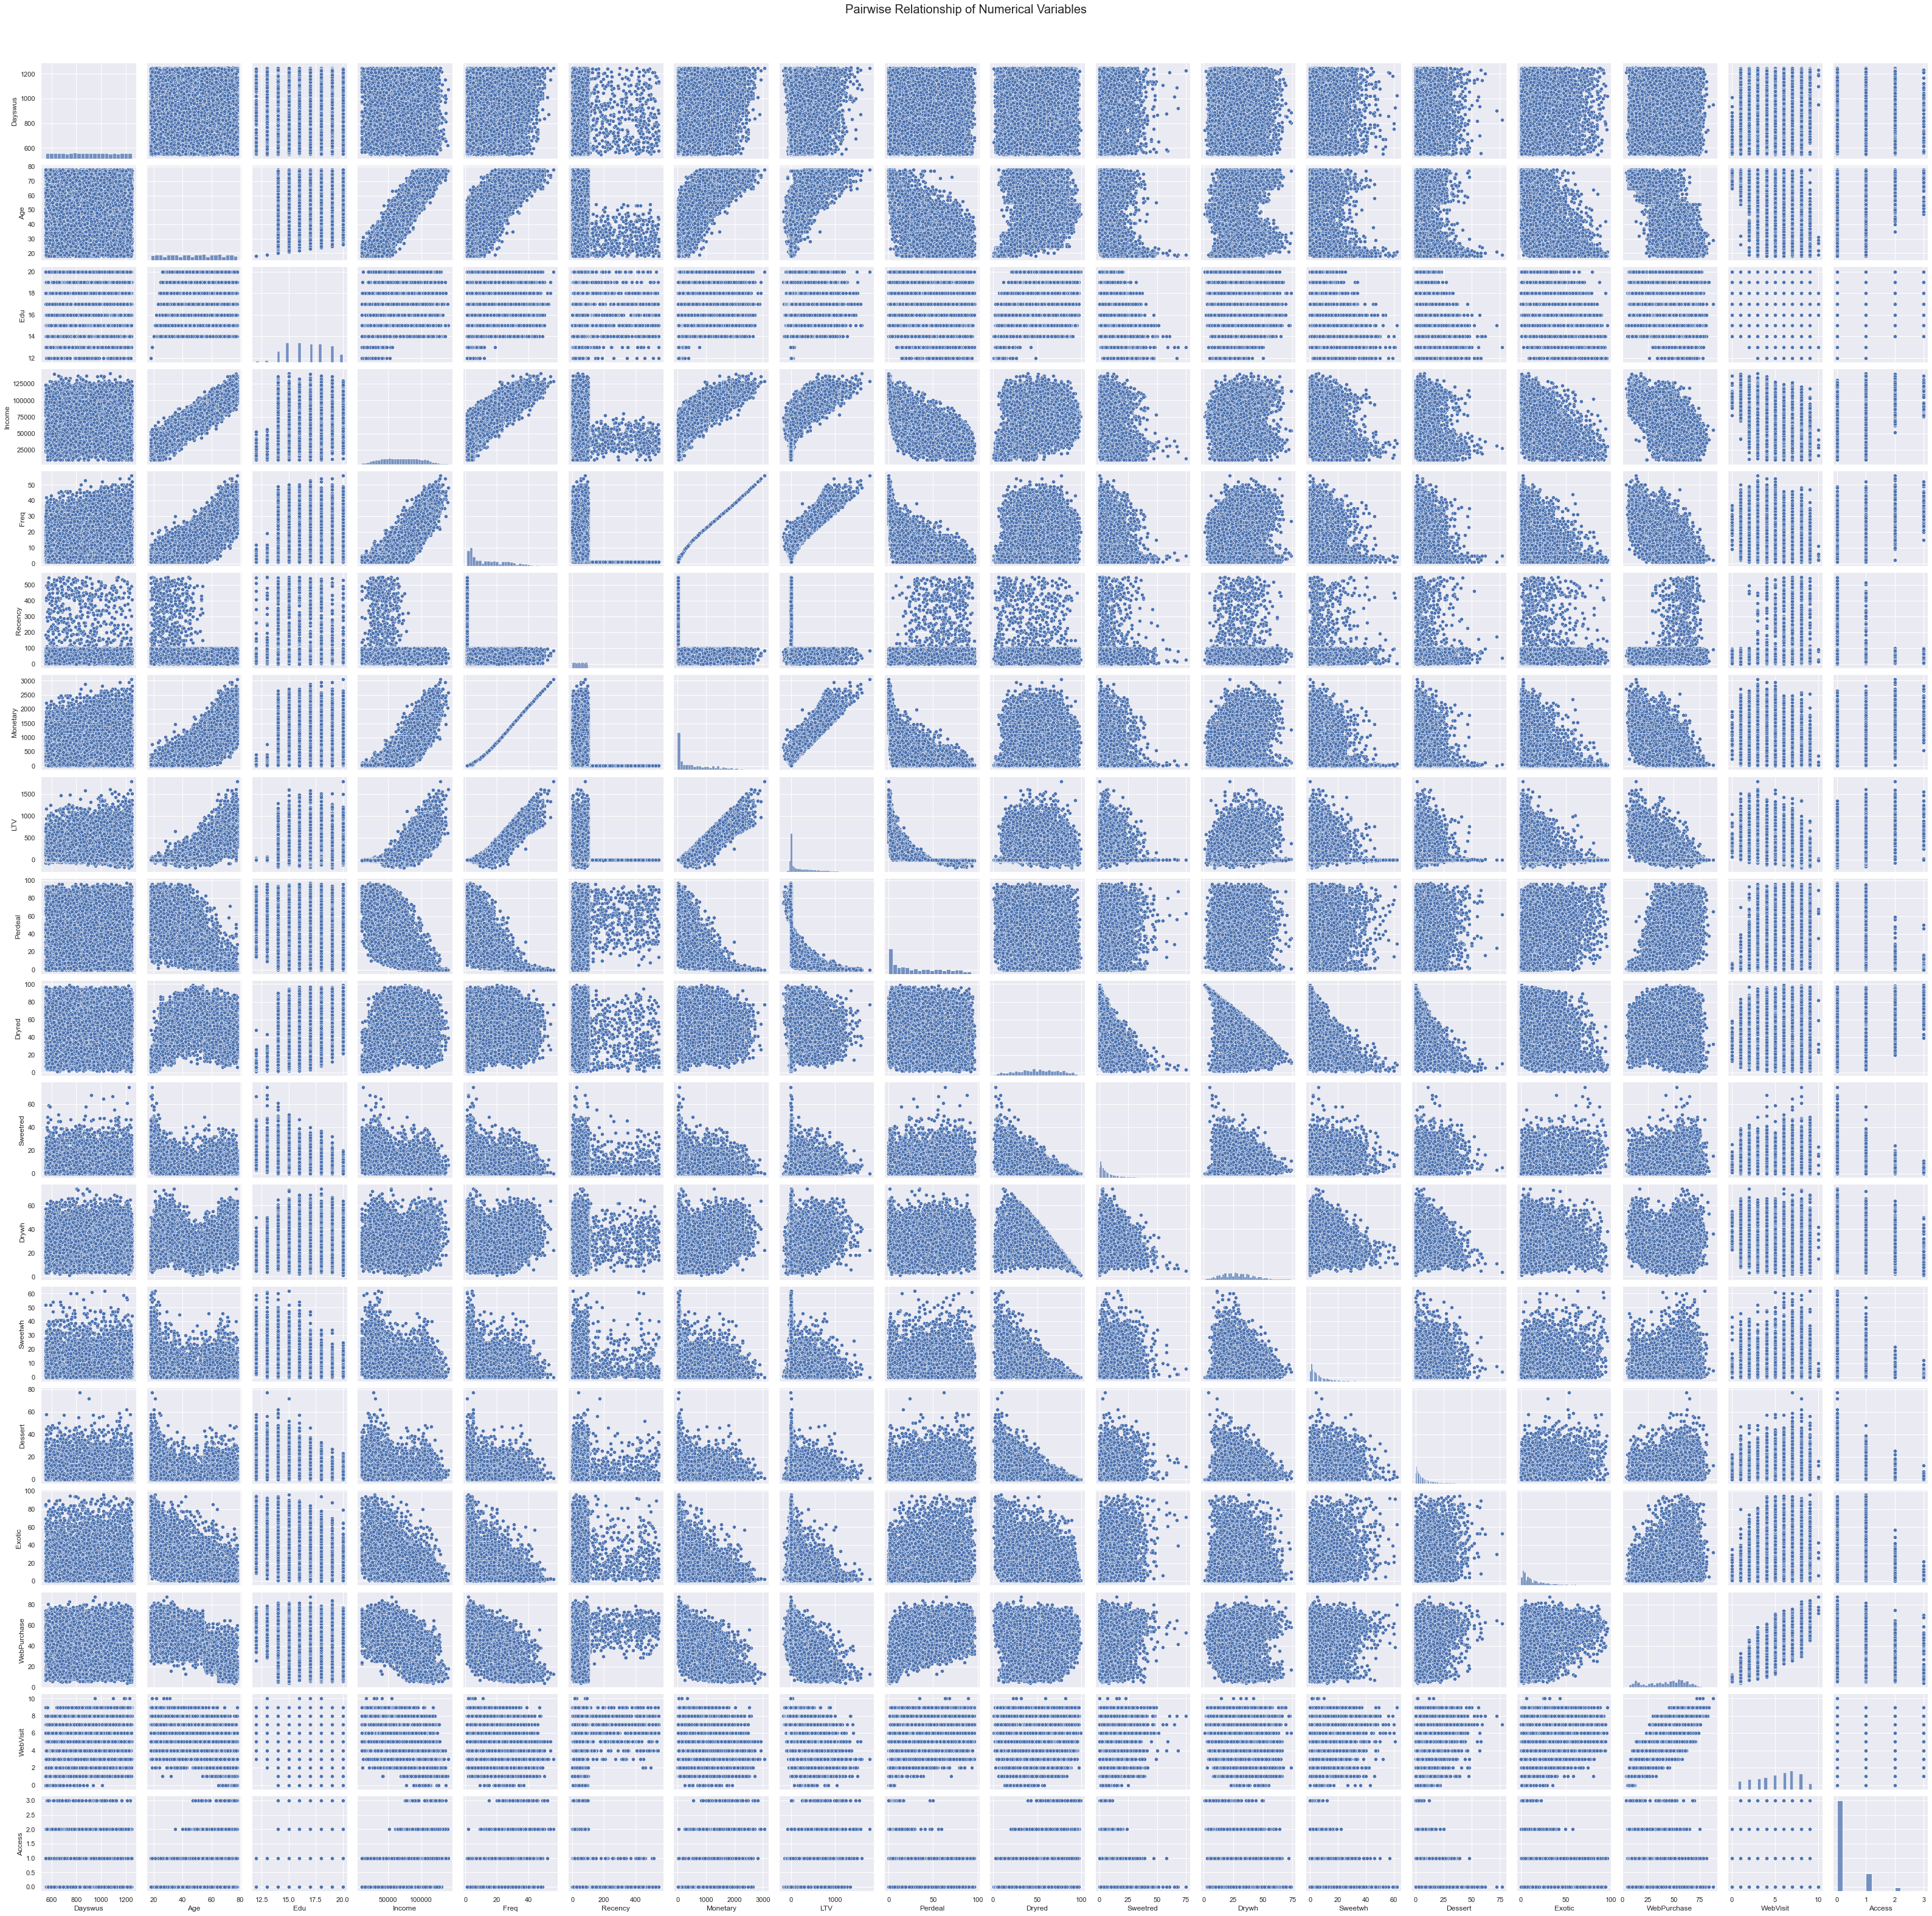

In [17]:
# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features

# Setting pairplot
sns.pairplot(data=df[features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

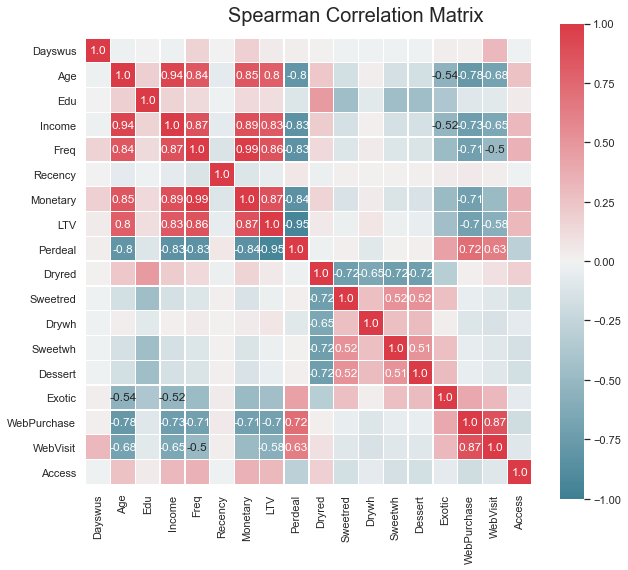

In [20]:
# correlation check 
# 
# # Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

### Notations:
- We can notice a high correlation between some pairs of variables, in particular the 2 highest percentage are the correlations between Income - Age and Monetary - Freq. We will analyse further Monetary and Frew, while in our opinion Income - Age can be both important for the cluster analysis we will compute afterwards, thus we keep these 2 variables in the dataset.
- Many binary features present a considerable high percentage of 0s.
- 8 metric features are left-skewed : in these cases some transformation may be considerable

## 3. Data pre-processing

### 3.1. Correlation check

In [27]:
def corrheatmap(dataframe, distance):
    sns.set(style="white")

    # Compute the correlation matrix
    corr = dataframe.corr(method= distance) #Getting correlation of numerical variables

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
    mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True) #Make a diverging palette between two HUSL colors. Return a matplotlib colormap object.

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, annot=True,annot_kws={"fontsize":10}, linewidths=.5,vmin = -1, vmax = 1, ax=ax)

    # Layout
    plt.subplots_adjust(top=0.95)
    plt.suptitle("Correlation matrix", fontsize=15)
    plt.yticks(rotation=0)
    # Fixing the bug of partially cut-off bottom and top cells
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values

    plt.show()

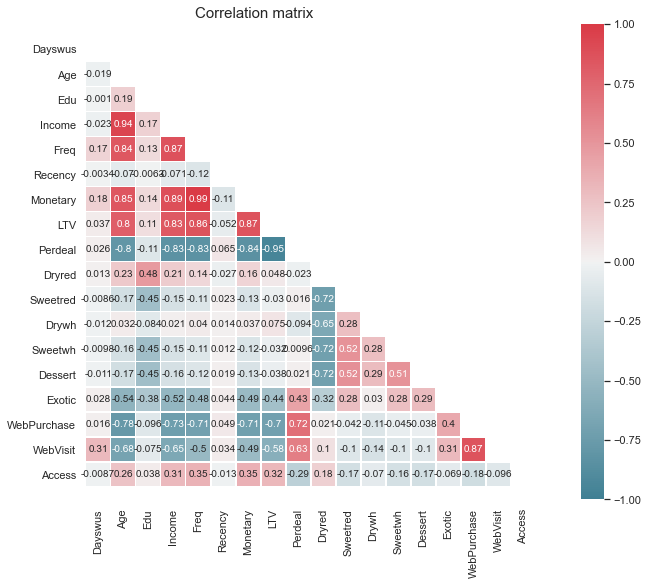

In [28]:
corrheatmap(df[metric_features], 'spearman')

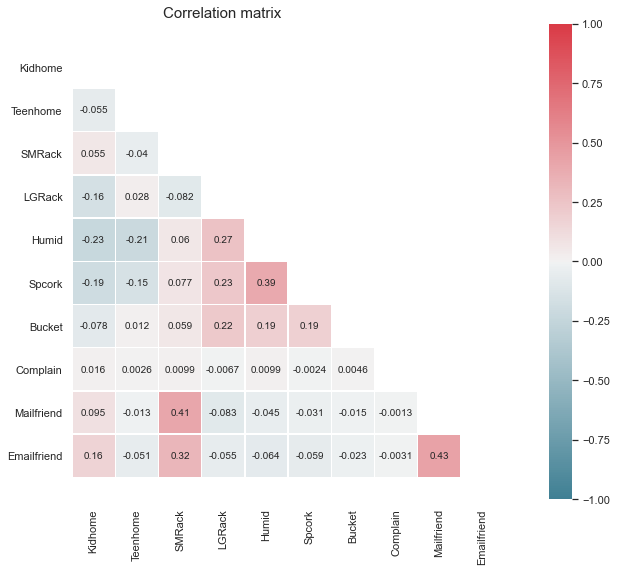

In [30]:
corrheatmap(df[non_metric_features], 'spearman')

The most relevant correlation detected is the between Monetary and Freq. Considering the importances of the variables and the other correlations, we decide to drop the variable 'Monetary'

In [31]:
# dropping 'Freq'
df.drop(columns = ['Monetary'], inplace = True)

# updating metric_features 's list
metric_features.remove('Monetary')

### 3.2. Normalization

In [46]:
# Normalizing the variables with RobustScaler
df = pd.DataFrame(RobustScaler().fit_transform(df), columns=df.columns, index = df.index)

df.head()

### 3.3. Outliers remotion

Based on the analysis conducted so far, the plots show that some variables may contain some outliers. 
DBSCAN needed.

## 4. Modeling

### 4.1. DBSCAN for Outliers

Performing DBSCAN in order to leave to the algorithm the automatic detection of the outliers

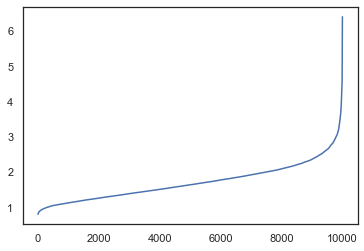

In [51]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(df)
distances, _ = neigh.kneighbors(df)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [55]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=10, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [57]:
# Concatenating the labels to df
df_dbscan = pd.concat([df, pd.Series(dbscan_labels, index=df.index, name="dbscan_labels")], axis=1)
df_dbscan.head()

Dayswus       Age       Edu    Income  Kidhome  Teenhome  Freq  \
Custid                                                                    
5325   -0.688080  0.233333  1.000000  0.190113      0.0       0.0   0.4   
3956    0.419700  0.900000  0.333333  0.788114      0.0       0.0   1.2   
3681   -0.650964 -1.000000 -1.666667 -0.944343      1.0       0.0  -0.4   
2829    0.442541 -0.200000 -0.333333 -0.185687      1.0       1.0  -0.5   
8788   -0.162741 -0.033333 -0.333333 -0.094888      0.0       1.0  -0.5   

         Recency       LTV  Perdeal  ...  SMRack  LGRack  Humid  Spcork  \
Custid                               ...                                  
5325   -0.650718  1.060109    -0.36  ...     0.0     0.0    0.0     0.0   
3956   -0.363636  1.316940    -0.46  ...     0.0     0.0    0.0     1.0   
3681    0.076555 -0.174863     1.26  ...     0.0     0.0    0.0     0.0   
2829   -0.114833 -0.172131     0.90  ...     0.0     0.0    0.0     0.0   
8788   -0.937799 -0.144809     0.20  ...     0.0     0.0    0.0     0.0   

        Bucket  Access  Complain  Mailfriend  Emailfriend  dbscan_labels  
Custid                                                                    
5325       0.0     0.0       0.0         0.0          0.0              0  
3956       0.0     0.0       0.0         0.0          0.0              0  
3681       0.0     0.0       0.0         0.0          0.0              0  
2829       0.0     0.0       0.0         1.0          1.0              0  
8788       0.0     0.0       0.0         0.0          0.0              0  

[5 rows x 28 columns]

In [62]:
# the observations identified as outliers are the ones with labels = -1 
# dispaying the outliers detected
df_dbscan[df_dbscan['dbscan_labels'] == -1]

Dayswus       Age       Edu    Income  Kidhome  Teenhome  Freq  \
Custid                                                                    
4324   -0.068522 -0.933333 -1.000000 -0.935153      1.0       0.0 -0.55   
5005   -0.462527 -0.866667 -0.333333 -0.963487      1.0       0.0 -0.55   
8040   -0.970735 -0.800000 -0.666667 -1.066599      0.0       0.0 -0.45   
2736   -0.551035 -1.000000 -1.666667 -0.920076      1.0       0.0 -0.45   
3950    0.088508 -0.966667 -1.333333 -0.683968      1.0       1.0 -0.55   
...          ...       ...       ...       ...      ...       ...   ...   
7983    0.682370  0.500000 -0.666667  0.156432      0.0       1.0  0.40   
5832   -0.905068 -1.000000 -1.666667 -0.771936      1.0       0.0 -0.55   
6469    0.528194 -1.000000 -1.666667 -0.895046      0.0       0.0 -0.45   
4725    0.905068 -0.900000 -0.666667 -1.025548      0.0       0.0 -0.55   
5957    0.922198 -0.966667 -1.333333 -1.161982      1.0       0.0 -0.50   

         Recency       LTV  Perdeal  ...  SMRack  LGRack  Humid  Spcork  \
Custid                               ...                                  
4324    3.655502 -0.158470     0.74  ...     0.0     0.0    0.0     0.0   
5005    3.674641 -0.161202     1.12  ...     0.0     0.0    0.0     0.0   
8040   -0.325359 -0.153005     0.28  ...     0.0     0.0    0.0     0.0   
2736    0.459330 -0.166667     1.04  ...     0.0     0.0    0.0     0.0   
3950    7.043062 -0.172131     1.36  ...     0.0     0.0    0.0     0.0   
...          ...       ...      ...  ...     ...     ...    ...     ...   
7983   -0.995215  0.393443    -0.08  ...     0.0     0.0    0.0     0.0   
5832    9.473684 -0.155738     0.50  ...     0.0     0.0    0.0     0.0   
6469   -0.095694 -0.142077     0.12  ...     0.0     0.0    0.0     0.0   
4725    8.765550 -0.155738     0.46  ...     0.0     0.0    0.0     0.0   
5957   -0.172249 -0.163934     0.82  ...     1.0     0.0    0.0     0.0   

        Bucket  Access  Complain  Mailfriend  Emailfriend  dbscan_labels  
Custid                                                                    
4324       0.0     0.0       0.0         0.0          0.0             -1  
5005       0.0     0.0       0.0         0.0          0.0             -1  
8040       0.0     0.0       0.0         1.0          1.0             -1  
2736       0.0     0.0       0.0         1.0          0.0             -1  
3950       0.0     0.0       0.0         1.0          0.0             -1  
...        ...     ...       ...         ...          ...            ...  
7983       0.0     0.0       0.0         1.0          0.0             -1  
5832       0.0     0.0       0.0         0.0          0.0             -1  
6469       0.0     0.0       0.0         1.0          1.0             -1  
4725       0.0     0.0       0.0         0.0          0.0             -1  
5957       0.0     1.0       0.0         1.0          1.0             -1  

[130 rows x 28 columns]

In [68]:
# dropping the outliers and storing the result in df_clean
df_clean = df_dbscan[~df_dbscan['dbscan_labels'] == -1].drop(columns=['dbscan_labels'])

### 4.2. SOM for visualizing the dimensional space

Performing now the Self Organizing Maps algorithm in order to better understand the high-dimensional space of the dataset we're working with

In [75]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(500)

sm = sompy.SOMFactory().build(
    df_clean.values, 
    mapsize=(15, 15),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=df_clean.columns
)
sm.train(n_job=4, verbose=None, train_rough_len=100, train_finetune_len=100)

C:\Users\lorep\anaconda3\lib\site-packages\sompy\visualization\plot_tools.py:45: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(shape[0], shape[1], comp + 1, aspect='equal')


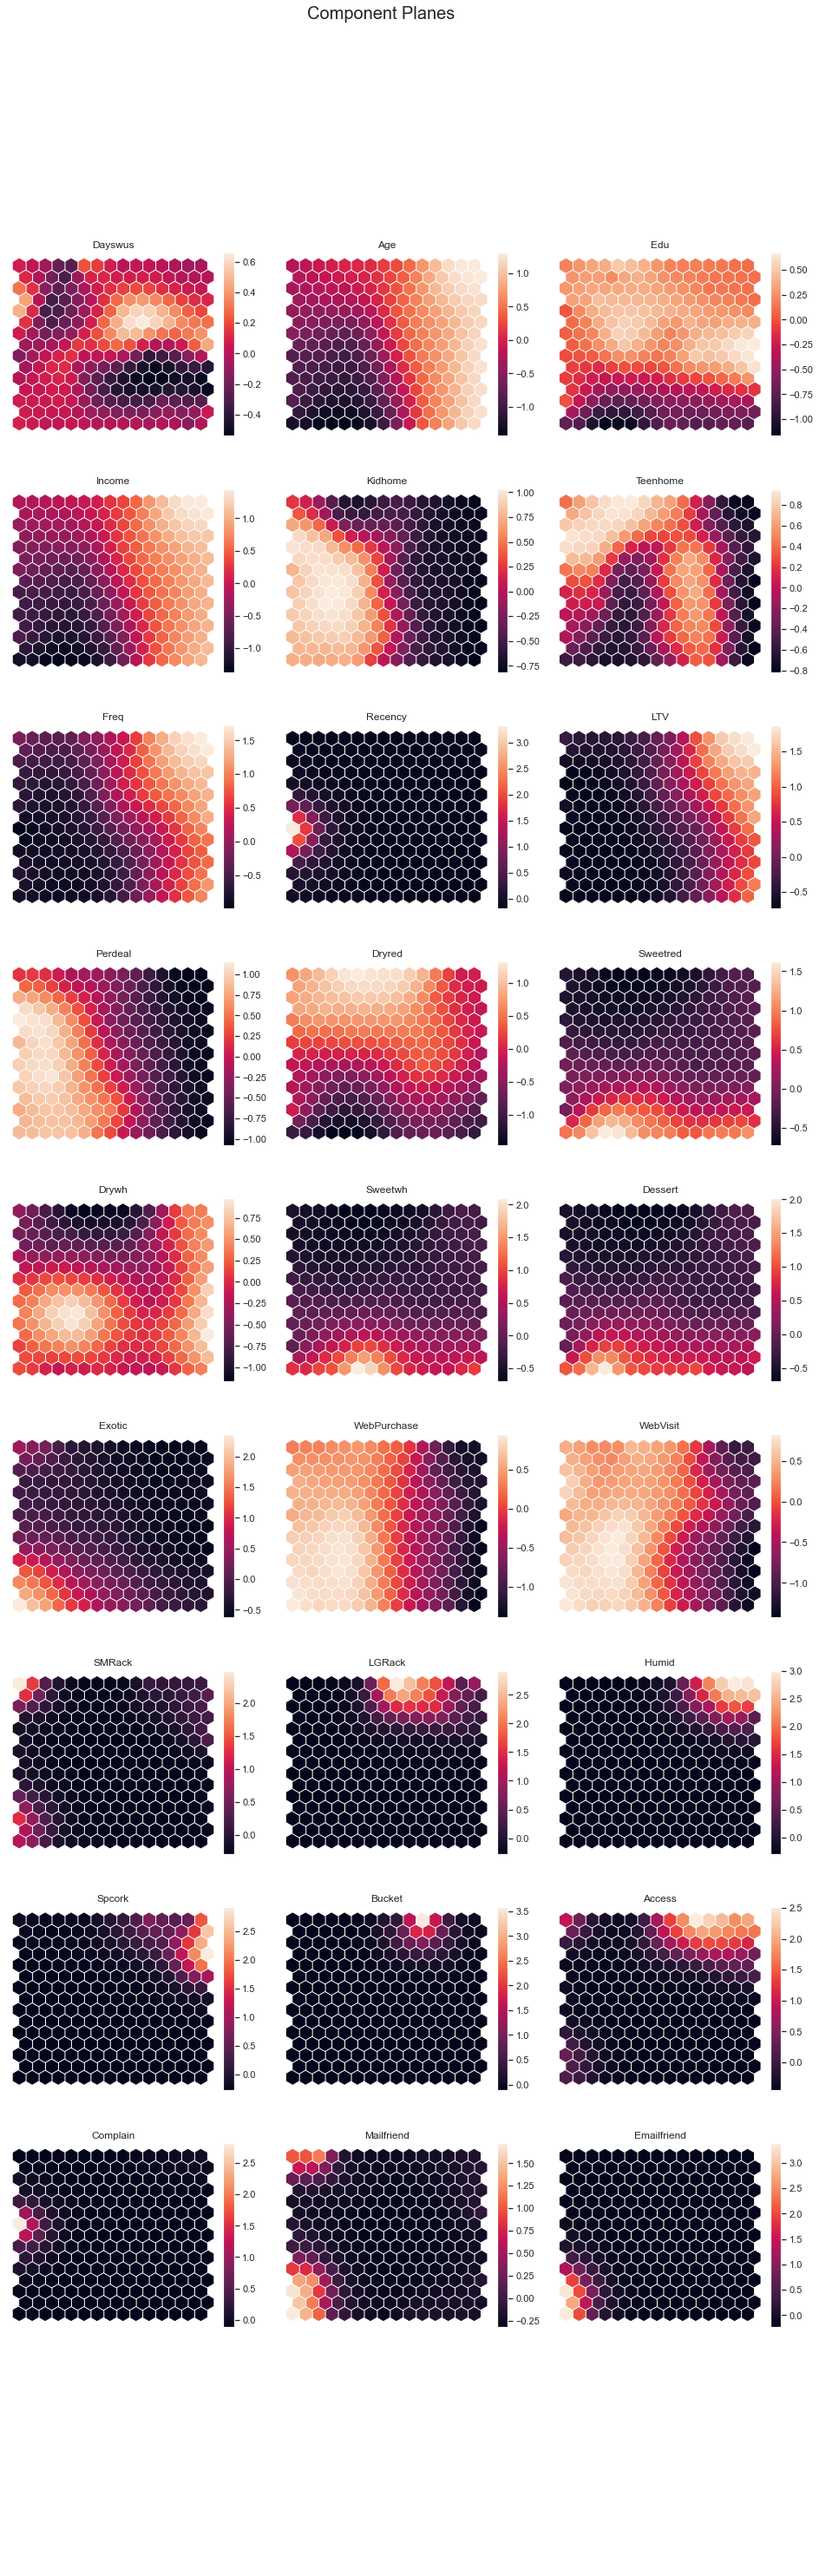

In [76]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

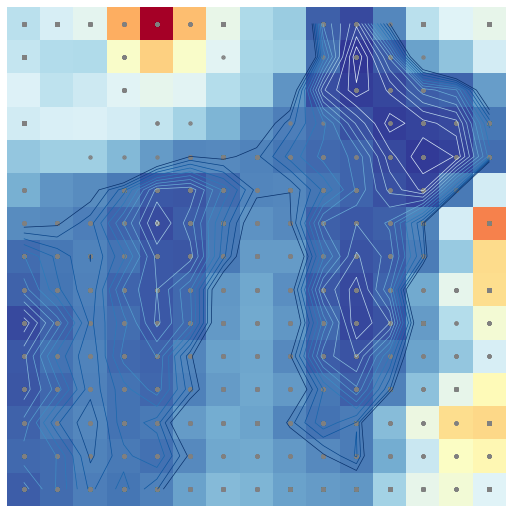

In [77]:
# U-matrix

u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

#UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

## 4.3. K-Means

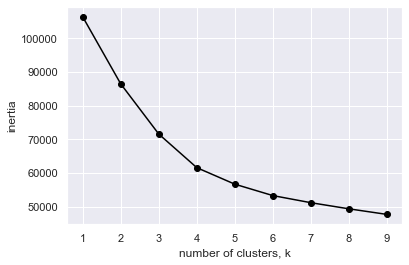

In [78]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_clean)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [81]:
# kmeans with n_clusters = 3
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df_clean)
# the predict method
KM_labels = kmclust.predict(df_clean)

df_concat_km = pd.concat([df_clean, pd.Series(KM_labels, index=df_clean.index, name="labels")], axis=1)

<AxesSubplot:xlabel='labels', ylabel='count'>

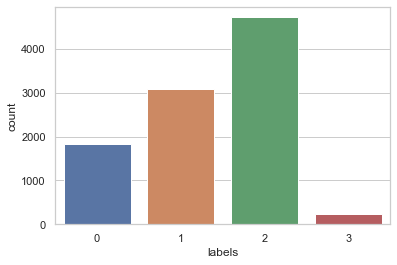

In [83]:
sns.set_style("whitegrid")
sns.countplot(x = df_concat_km['labels'])